<a href="https://colab.research.google.com/github/abhijit-exe/abhijit-exe/blob/main/Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:
Handwritten Digit Recognition Using the MNIST Dataset with Convolutional Neural Networks**

Using the MNIST dataset, which contains 60,000 training images and 10,000 test images of digits from 0 to 9, this project builds a Convolutional Neural Network (CNN).

The model's performance will be evaluated on key metrics such as accuracy, precision, recall, and F1-score, allowing for a comprehensive understanding of its effectiveness.

In [ ]:
#Getting essential libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessing: Normalize images to a range of [0, 1] and reshape
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the CNN model architecture
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))

# Dropout to reduce overfitting
model.add(layers.Dropout(0.3))

# Output Layer with Softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up learning rate reduction callback
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64,
                    validation_split=0.2, callbacks=[lr_scheduler])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc*100:.2f}%")

# Performance metrics (accuracy, precision, recall, F1-score)
from sklearn.metrics import classification_report
import numpy as np

# Predict labels for test data
test_predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print classification report
print(classification_report(true_labels, test_predictions))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.8845 - loss: 0.3758 - val_accuracy: 0.9796 - val_loss: 0.0657 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9765 - loss: 0.0751 - val_accuracy: 0.9832 - val_loss: 0.0593 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 96ms/step - accuracy: 0.9854 - loss: 0.0461 - val_accuracy: 0.9841 - val_loss: 0.0510 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 95ms/step - accuracy: 0.9880 - loss: 0.0380 - val_accuracy: 0.9830 - val_loss: 0.0638 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 100ms/step - accuracy: 0.9914 - loss: 0.0260 - val_accuracy: 0.9855 - val_loss: 0.0485 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9819 - val_loss: 0.0695 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 100ms/step - accuracy: 0.992

**Visualization of Model Accuracy and Model Loss accross different epochs**

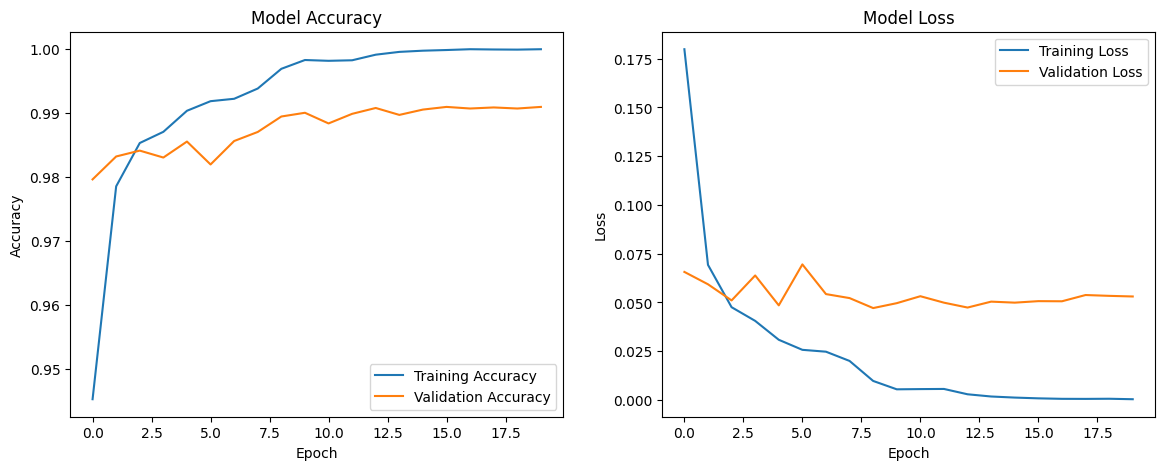

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


**Visualization of Precision, Recall and F1-score by class**

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


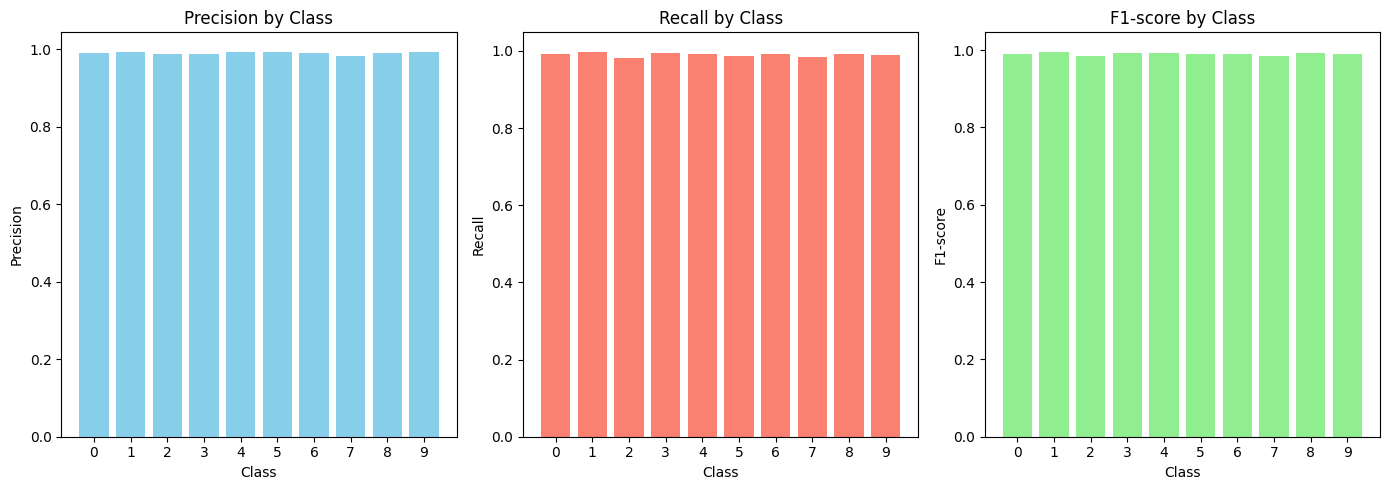

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Generate predictions and obtain the classification report
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Exclude 'accuracy', 'macro avg', and 'weighted avg' rows
class_metrics = report_df.iloc[:-3, :]

# Plot Precision, Recall, F1-score for each class
plt.figure(figsize=(14, 5))

# Precision, Recall, F1-score plots
plt.subplot(1, 3, 1)
plt.bar(class_metrics.index, class_metrics['precision'], color='skyblue')
plt.title('Precision by Class')
plt.xlabel('Class')
plt.ylabel('Precision')

plt.subplot(1, 3, 2)
plt.bar(class_metrics.index, class_metrics['recall'], color='salmon')
plt.title('Recall by Class')
plt.xlabel('Class')
plt.ylabel('Recall')

plt.subplot(1, 3, 3)
plt.bar(class_metrics.index, class_metrics['f1-score'], color='lightgreen')
plt.title('F1-score by Class')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()


**Visualizing sample images with True and Predicted Labels, where *Green = Correct Prediction* and *Red = Incorrect Prediction***

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


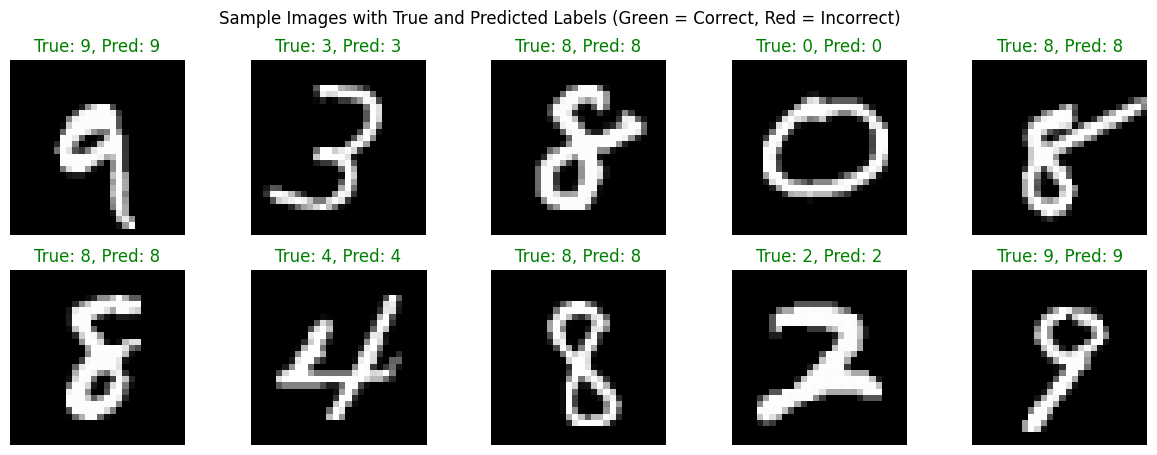

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Selecting a few random images from the test set
num_samples = 10  # Number of samples to display
indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[indices]
sample_labels = np.argmax(test_labels[indices], axis=1)  # True labels
predicted_labels = np.argmax(model.predict(sample_images), axis=1)  # Model predictions

# Plot the images with true and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    color = 'green' if predicted_labels[i] == sample_labels[i] else 'red'
    plt.title(f"True: {sample_labels[i]}, Pred: {predicted_labels[i]}", color=color)

plt.suptitle("Sample Images with True and Predicted Labels (Green = Correct, Red = Incorrect)")
plt.show()
